In [1]:
import pandas as pd
sensor_metadata = pd.read_csv("./data/tokyo/amd_master.tsv", delimiter="\t")
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/Users/huynguyen/tensorflow-py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/huynguyen/tensorflow-py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
sensor_metadata.head()

,aid,name,lat1,lat2,lng1,lng2,alt
0,11001,宗谷岬,45,31.2,141,56.1,26
1,11016,稚内,45,24.9,141,40.7,3
2,11046,礼文,45,18.3,141,2.7,65
3,11061,声問,45,24.2,141,48.0,8
4,11076,浜鬼志別,45,20.1,142,10.2,13


/Users/huynguyen/tensorflow-py3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


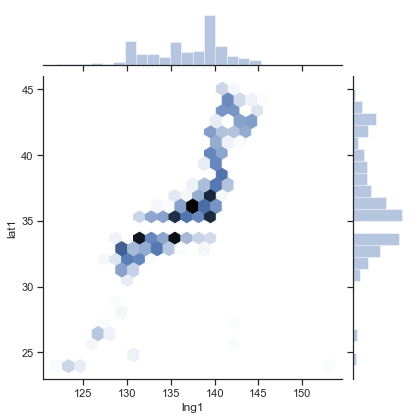

In [3]:
import seaborn as sns
sns.set(style="ticks")
sns.jointplot(x="lng1", y="lat1", kind="hex", data=sensor_metadata)

From the figure above, we can see that the sensors are concentrated in busy regions (such as around Tokyo and Osaka). The distribution is sparse in Hokkaido and other small islands.
Let us plot one of the time series to understand the data more.

In [12]:
from io_utils import load_sensor_data, file_names
df = load_sensor_data(file_names[20]) # this file does not have many missing values
df = df.fillna(method="ffill")

In [13]:
df.head()

,pr,f_pr,max_ws,f_max_ws,ave_wv,f_ave_wv,ave_ws,f_ave_ws,max_tp,f_max_tp,min_tp,f_min_tp,sl,f_sl,sd,f_sd,dsd,f_dsd
datetime,,,,,,,,,,,,,,,,,,
2012-01-01 00:10:00,0.0,0,22.0,0,3.0,0,17.0,0,-13.0,0,-14.0,0,0.0,2,NaN,56,NaN,56
2012-01-01 00:20:00,0.0,0,25.0,0,3.0,0,17.0,0,-13.0,0,-15.0,0,0.0,2,NaN,56,NaN,56
2012-01-01 00:30:00,0.0,0,28.0,0,2.0,0,20.0,0,-12.0,0,-13.0,0,0.0,2,NaN,56,NaN,56
2012-01-01 00:40:00,0.0,0,33.0,0,3.0,0,21.0,0,-12.0,0,-14.0,0,0.0,2,NaN,56,NaN,56
2012-01-01 00:50:00,0.0,0,30.0,0,3.0,0,18.0,0,-10.0,0,-13.0,0,0.0,2,NaN,56,NaN,56


A simple line plot yields:

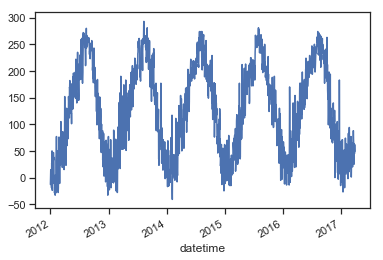

In [14]:
df["max_tp"].asfreq("D").plot.line()

Even a bird can see that there is a clear periodicity in the temperature. In all years, summers result in the highest temperature, while winters and springs compete for the bottom.

In time series analysis, it's worth considering the question: how does one data point chronologically affects the next? To answer it, we need to expand our toolbox and rely on a special kind of plot.

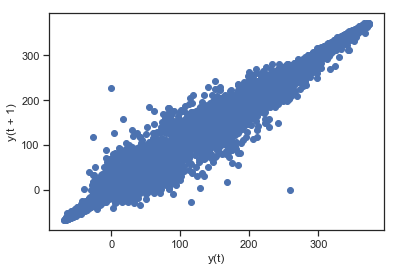

In [15]:
from pandas.plotting import lag_plot
lag_plot(df.resample("D")["max_tp"].tail(250))

The lag plot shows that the maximum temperature of a day clearly affects the maximum temperature of the next day.

To further understand this data, we must use a special kind of plot, the autocorrelation plot.

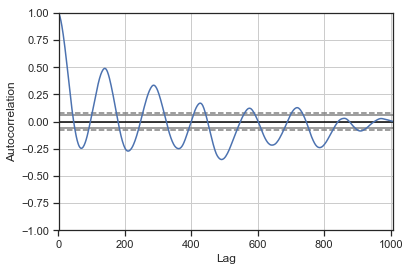

In [16]:
from pandas.plotting import autocorrelation_plot
ax = autocorrelation_plot(df["max_tp"].tail(1008)) # the last 7 days

Correlation drops off as days become farther apart. The temperature of a week ago has very little effect on today. As we extend the lag, we can see that there is no causal relationship between two arbitary days.

We proceed to plot all properties of the data using line plots.

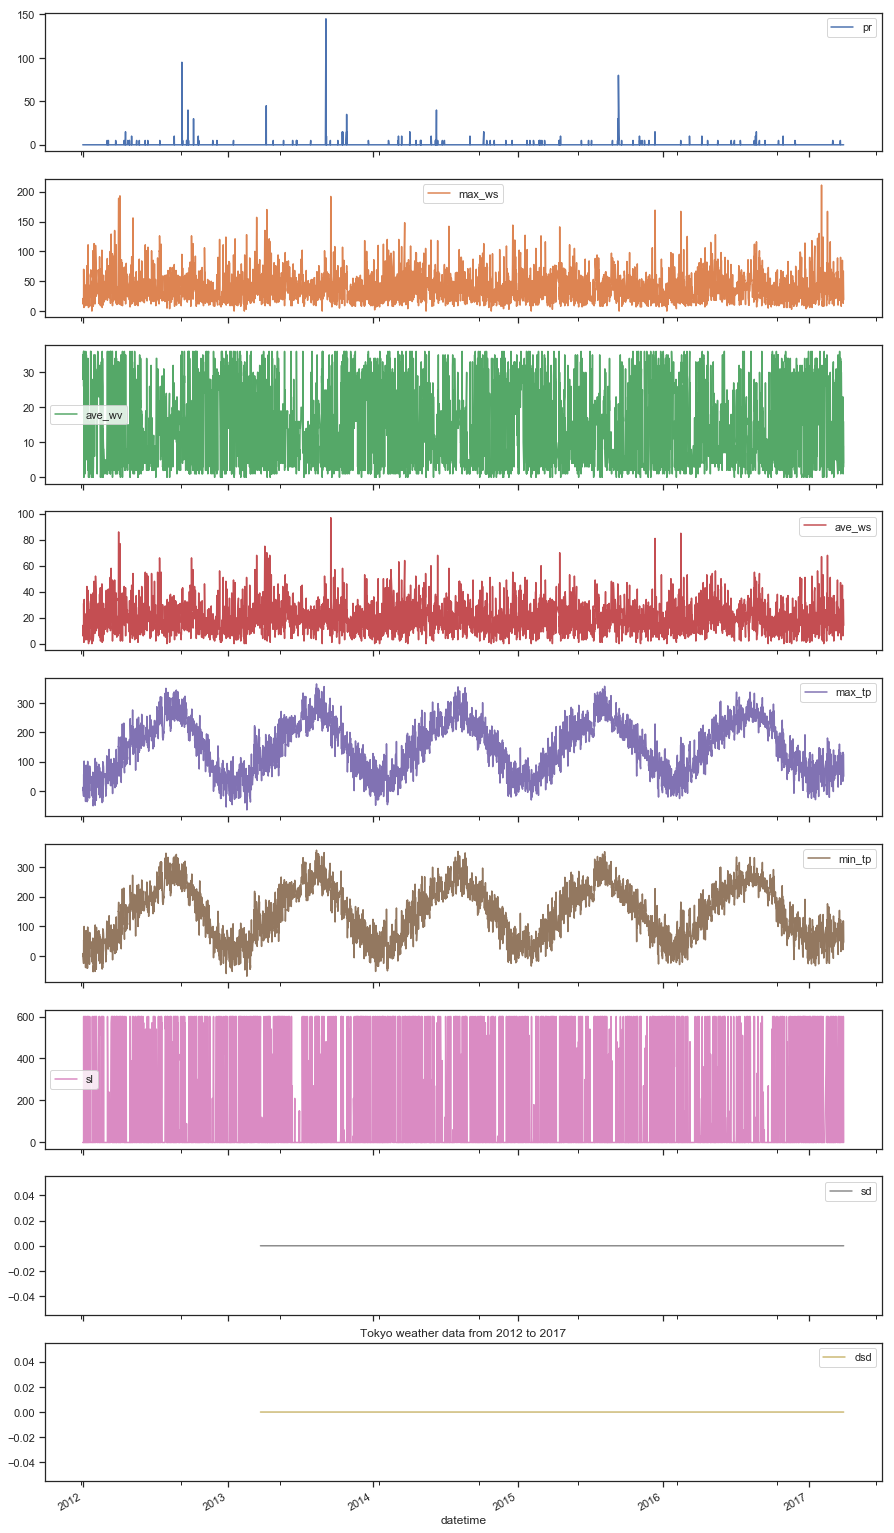

In [19]:
data_without_flags = df.drop(df.filter(regex="f_"), axis=1)
data_without_flags["2012":"2017"].sample(5000).plot(subplots=True, figsize=(15, 30))
plt.title("Tokyo weather data from 2012 to 2017")
plt.show()

There is clear seasonality in the temperatures. In all the graphs there were no trends or cycles. The precipation and wind speed are stationary.